In [1]:
 pip install plotly plotly chart-studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean 
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.graph_objs as go
import chart_studio
import plotly.express as px
style.use("ggplot")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#Reading our data set

tesla_features=pd.read_csv('/content/drive/My Drive/Colab Notebooks/tesla_features.csv',parse_dates=True, index_col="Unnamed: 0", infer_datetime_format=True)
tesla_features

,daily_returns_tlt,daily_returns_tlt_volume,daily_returns_tsla,daily_returns_tsla_volume,avg_sentiment,target
2018-07-03,0.005109,-0.625701,-0.072060,-0.356887,-0.016740,0
2018-07-05,0.002869,0.044150,-0.005836,0.456280,-0.450450,0
2018-07-06,0.003106,0.199468,-0.000647,-0.492655,-0.423822,1
2018-07-09,-0.006112,0.201659,0.030365,-0.190807,0.122037,1
2018-07-10,-0.000082,-0.079239,0.012818,0.236055,0.097726,0
...,...,...,...,...,...,...
2020-06-19,0.000616,-0.382424,-0.003436,-0.573621,0.201724,0
2020-06-22,0.000123,-0.069760,-0.006027,-0.230835,0.259793,1
2020-06-23,-0.006572,0.124087,0.007159,-0.015284,0.141681,0
2020-06-24,0.010705,0.314312,-0.040742,0.782926,-0.075773,1


In [5]:
corr=tesla_features.drop(columns=["target","avg_sentiment"])
corr.corr()

,daily_returns_tlt,daily_returns_tlt_volume,daily_returns_tsla,daily_returns_tsla_volume
daily_returns_tlt,1.000000,0.050144,-0.163471,-0.038167
daily_returns_tlt_volume,0.050144,1.000000,-0.059107,0.247036
daily_returns_tsla,-0.163471,-0.059107,1.000000,0.000779
daily_returns_tsla_volume,-0.038167,0.247036,0.000779,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



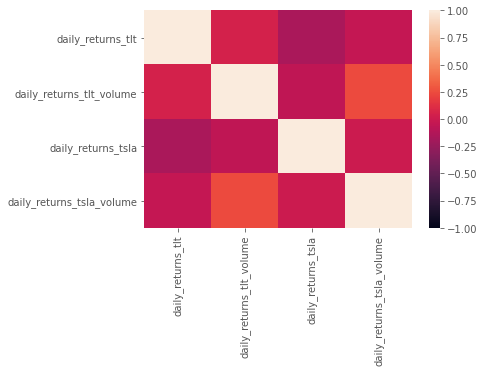

In [6]:
import seaborn as sns
sns.heatmap(corr.corr(), vmin=-1, vmax=1)

**SVM**

In [7]:
from sklearn.model_selection import train_test_split
y = tesla_features["target"]
X =tesla_features.drop(columns="target")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.553475935828877
Testing Data Score: 0.536


In [10]:
  predictions = classifier.predict(X_test)
  results = pd.DataFrame({
      "Prediction": predictions, 
      "Actual": y_test
  }).reset_index(drop=True)
  results.head()

,Prediction,Actual
0,1,0
1,1,0
2,1,1
3,1,0
4,1,0


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix:")
display(cm_df)

print("\n Classification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,12,49
Actual 1,9,55



 Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.20      0.29        61
           1       0.53      0.86      0.65        64

    accuracy                           0.54       125
   macro avg       0.55      0.53      0.47       125
weighted avg       0.55      0.54      0.48       125



 **SVM - PCA**

In [12]:
tesla_scaled = StandardScaler().fit_transform(X)
# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the data.
tesla_pca = pca.fit_transform(tesla_scaled)
df_tesla_pca = pd.DataFrame(
    data=tesla_pca, columns=["principal component 1", "principal component 2","principal component 3"]
)
model = SVC(kernel='linear')
model.fit(df_tesla_pca, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
t = tesla_features["target"]
x = df_tesla_pca.iloc[:,0]
y = df_tesla_pca.iloc[:,1]
z = df_tesla_pca.iloc[:,2]

data = np.c_[x,y,z]

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
XX = X.flatten()
YY = Y.flatten()
    
# best-fit linear plane (1st-order)
A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
# evaluate it on grid
Z = C[0]*X + C[1]*Y + C[2]
fig = px.scatter_3d(
    df_tesla_pca,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color=t,
    width=800,
)
fig.add_trace(
    go.Surface(x=X, y=Y, z=Z, colorscale='jet', showscale=False),
    )


fig.update_layout(legend=dict(x=0, y=1))
fig.show()


**DECISION TREE**

In [14]:
from sklearn import tree
y = tesla_features["target"]
X =tesla_features.drop(columns="target")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
results = pd.DataFrame({
      "Prediction": predictions, 
      "Actual": y_test
  }).reset_index(drop=True)
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print("Confusion Matrix:")
display(cm_df)
print("\n Classification Report:")
print(classification_report(y_test, predictions))


Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,28,33
Actual 1,29,35



 Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.47        61
           1       0.51      0.55      0.53        64

    accuracy                           0.50       125
   macro avg       0.50      0.50      0.50       125
weighted avg       0.50      0.50      0.50       125



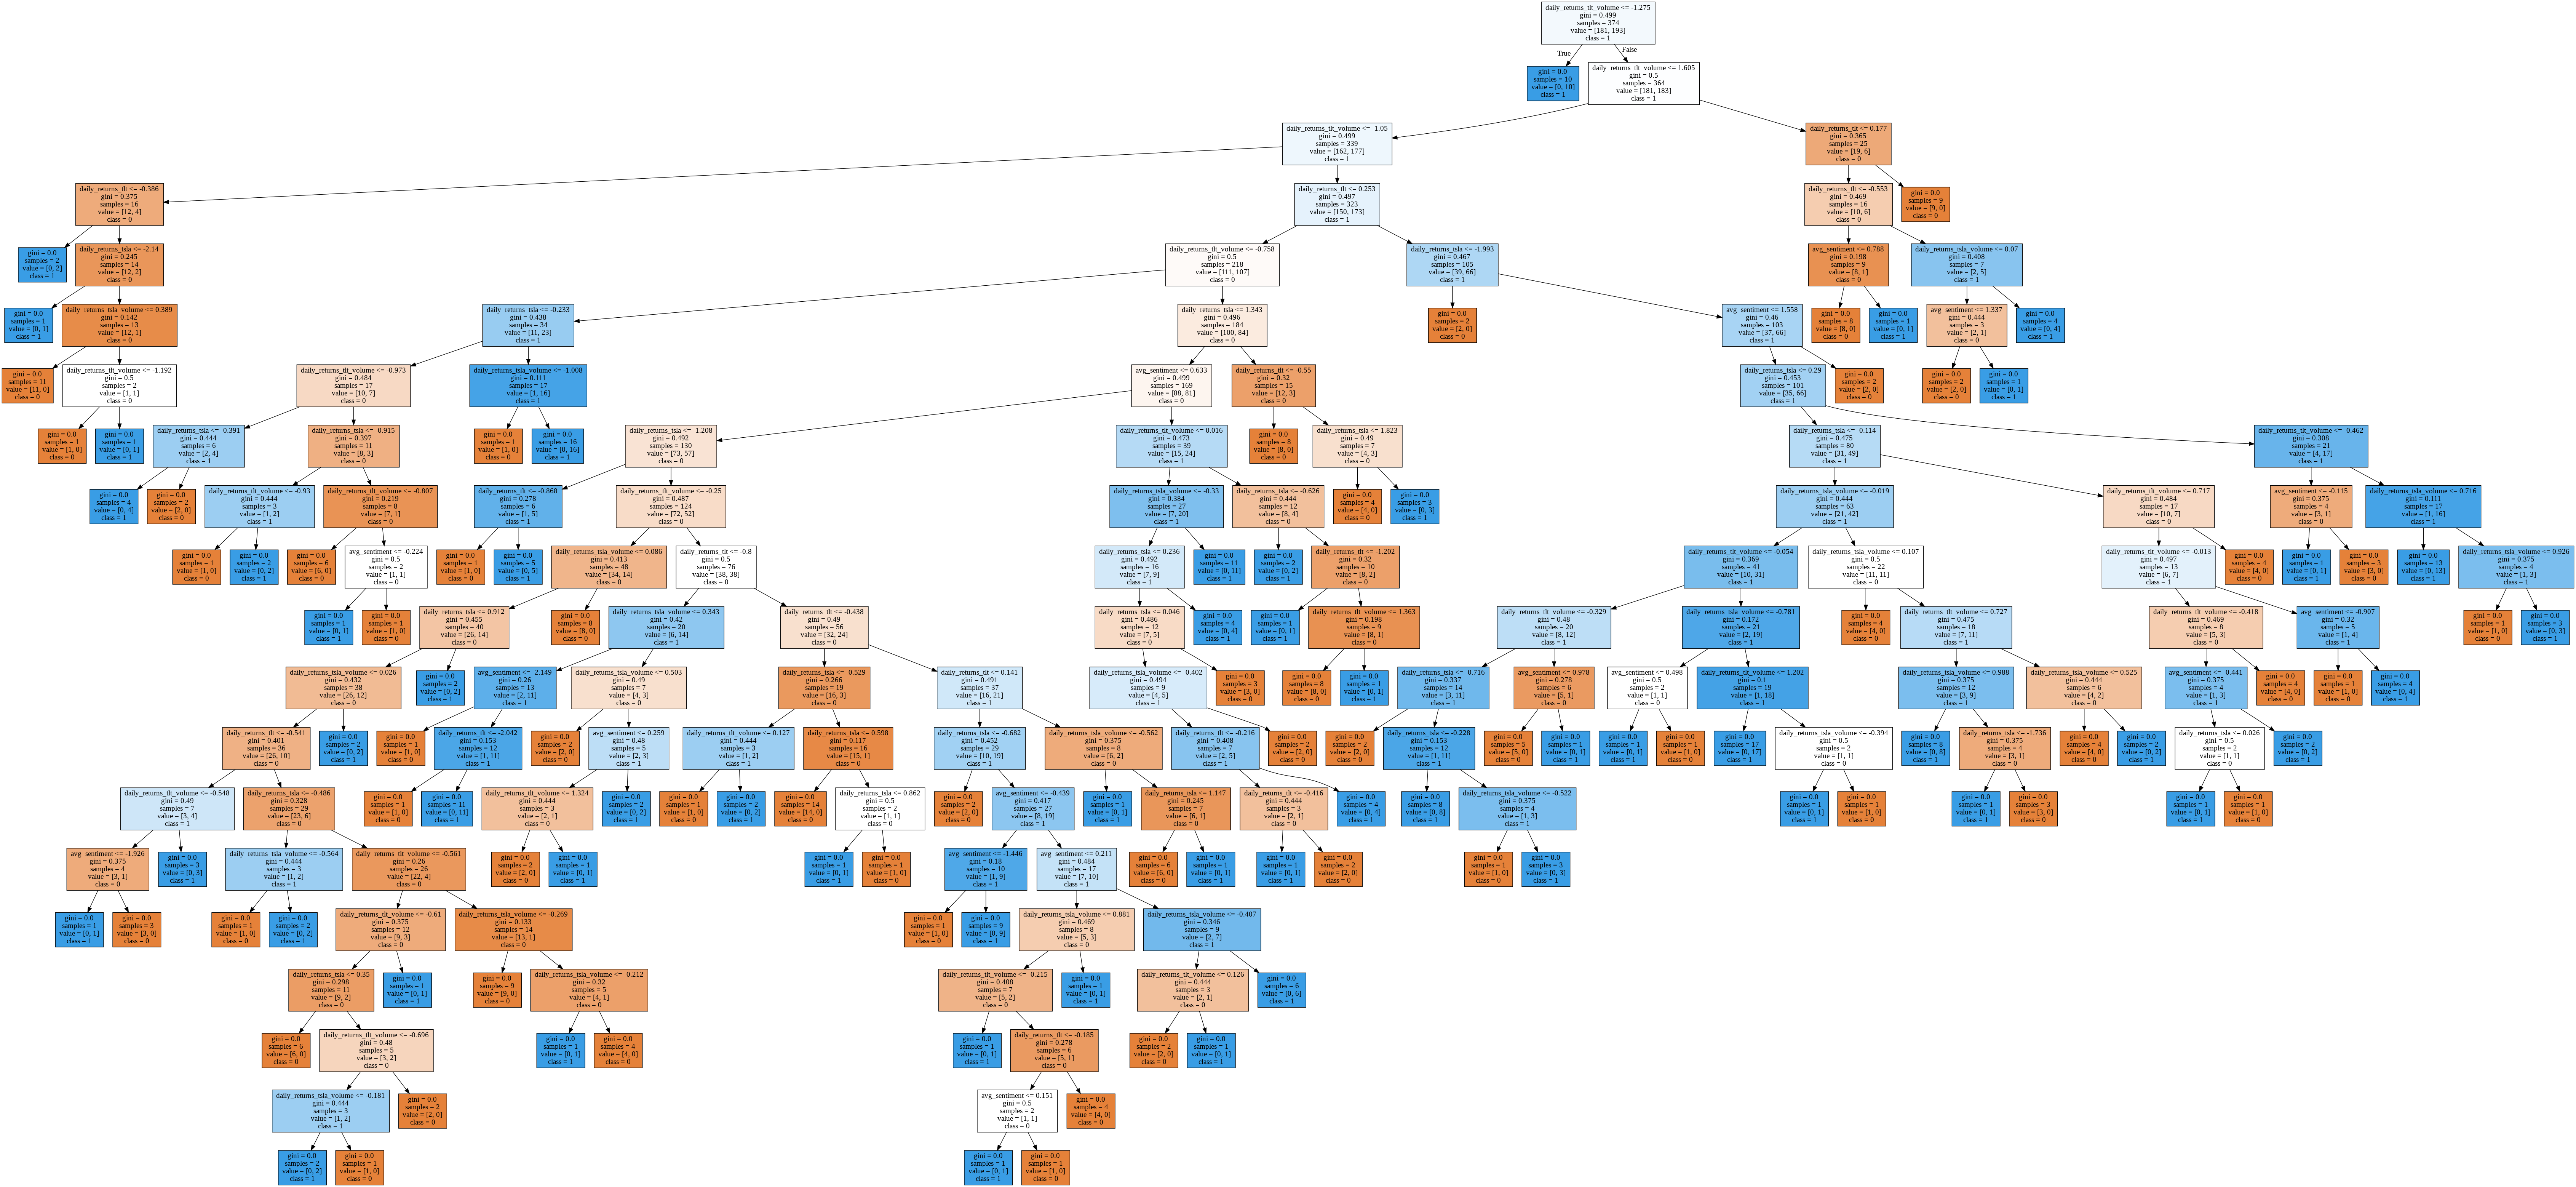

In [15]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


**RANDOM FOREST**

In [16]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=[100,300,500,700]
max_depth=[3,5]

for n_est in n_estimators:
  for depth in max_depth:
      
      rf_model = RandomForestClassifier(n_estimators=n_est,max_depth=depth ,random_state=78)

      rf_model = rf_model.fit(X_train_scaled, y_train)

      predictions = rf_model.predict(X_test_scaled)

      acc_score = accuracy_score(y_test, predictions)
      print(f' for {n_est} trees with max depth {depth} the accuracy score is: {acc_score}')

rf_model = RandomForestClassifier(n_estimators=100,max_depth=5 ,random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
print('\n Features importence for 100 trees and max depth of 5:')
for item in importances_sorted:
   n=round(item[0],4)
   print(f'{item[1]}: {n}')


 for 100 trees with max depth 3 the accuracy score is: 0.48
 for 100 trees with max depth 5 the accuracy score is: 0.448
 for 300 trees with max depth 3 the accuracy score is: 0.472
 for 300 trees with max depth 5 the accuracy score is: 0.464
 for 500 trees with max depth 3 the accuracy score is: 0.464
 for 500 trees with max depth 5 the accuracy score is: 0.424
 for 700 trees with max depth 3 the accuracy score is: 0.472
 for 700 trees with max depth 5 the accuracy score is: 0.448

 Features importence for 100 trees and max depth of 5:
daily_returns_tlt_volume: 0.2834
daily_returns_tlt: 0.2028
daily_returns_tsla: 0.2003
daily_returns_tsla_volume: 0.1607
avg_sentiment: 0.1528


**Gradient Tree Classifier**

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

X = tesla_features.copy()
X.drop("target", axis=1, inplace=True)
y = tesla_features["target"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


param_grid = {'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],'n_estimators':[80,100,150,250,500],'max_features':[2,3,4,5],'max_depth' : [3,4,5,6],'random_state' :[0]}

model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_results = grid.fit(X_train_scaled,y_train.ravel())

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

#running the best combo
model = GradientBoostingClassifier(
        n_estimators=grid_results.best_params_['n_estimators'],
        learning_rate=grid_results.best_params_['learning_rate'],
        max_features=grid_results.best_params_['max_features'],
        max_depth=grid_results.best_params_['max_depth'],
        random_state=0)
model.fit(X_train_scaled,y_train.ravel())
predictions = model.predict(X_test_scaled)
importances = model.feature_importances_
print('\nFeatures importence:')
importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
for item in importances_sorted:
   n=round(item[0],4)
   print(f'{item[1]}: {n}')




Best: 0.5586306306306306, using {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 5, 'n_estimators': 500, 'random_state': 0}

Features importence:
daily_returns_tlt: 0.2259
daily_returns_tsla: 0.2072
daily_returns_tlt_volume: 0.2058
daily_returns_tsla_volume: 0.1967
avg_sentiment: 0.1645


**KNN-unsuprvised learning**

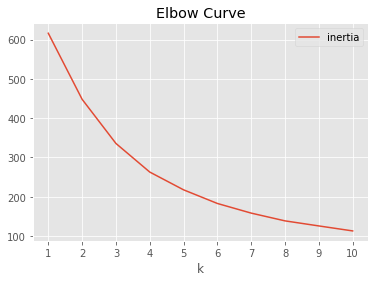

In [19]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tesla_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot(x="k", y="inertia", xticks=k, title="Elbow Curve")


In [42]:
model = KMeans(n_clusters=2, random_state=5)
model.fit(tesla_features)
df_knn=tesla_features.copy()
df_knn["predicted_targets"] = model.labels_
print("\n Classification Report:")
print(classification_report(tesla_features["target"], df_knn["predicted_targets"]))
fig = px.scatter_3d(
    df_knn,
    x="daily_returns_tsla",
    y="daily_returns_tsla_volume",
    z="avg_sentiment",
    color="predicted_targets",
    symbol="predicted_targets",
    
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


 Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.14      0.23       242
           1       0.53      0.91      0.67       257

    accuracy                           0.54       499
   macro avg       0.57      0.53      0.45       499
weighted avg       0.57      0.54      0.46       499



**Neural Network LSTM**

In [21]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number[0]:feature_col_number[1]]
        target = df.iloc[(i + window), target_col_number]
        features = features.values.tolist()
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1,1)

window_size = 5

feature_column = [0,5] 
target_column = 5
X, y = window_data(tesla_features, window_size, feature_column, target_column)
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler()
    X_train[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 
for i in range(X_test.shape[1]):
    X_test[:, i, :] = scalers[i].transform(X_test[:, i, :]) 

scaler = MinMaxScaler()
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[1], 1))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

##### Define the LSTM RNN model.
model = Sequential()

number_units = 10
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )

model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
#model.add(LSTM(100))model.add(Dense(1, activation='sigmoid'))model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 10)            480       
_________________________________________________________________
dropout (Dropout)            (None, 25, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 10)            840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 10)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [22]:
model.fit(X_train, y_train, epochs=10 ,shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
344/344 [==============================] - 5s 15ms/step - loss: 0.6954 - accuracy: 0.5203
Epoch 2/10
344/344 [==============================] - 5s 16ms/step - loss: 0.6950 - accuracy: 0.4797
Epoch 3/10
344/344 [==============================] - 6s 16ms/step - loss: 0.6952 - accuracy: 0.4535
Epoch 4/10
344/344 [==============================] - 6s 16ms/step - loss: 0.6947 - accuracy: 0.4593
Epoch 5/10
344/344 [==============================] - 6s 16ms/step - loss: 0.6942 - accuracy: 0.4767
Epoch 6/10
344/344 [==============================] - 5s 16ms/step - loss: 0.6945 - accuracy: 0.5058
Epoch 7/10
344/344 [==============================] - 5s 16ms/step - loss: 0.6939 - accuracy: 0.4797
Epoch 8/10
344/344 [==============================] - 5s 16ms/step - loss: 0.6947 - accuracy: 0.4622
Epoch 9/10
344/344 [==============================] - 5s 15ms/step - loss: 0.6923 - accuracy: 0.5174
Epoch 10/10
344/344 [==============================] - 5s 16ms/step - loss: 0.6953 - accura

In [23]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.4324


[0.6939876675605774, 0.4324324429035187]

In [24]:
predicted = model.predict(X_test)
values_y = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": predicted.ravel()
})
values_y.head()

,Real,Predicted
0,0.0,0.497329
1,1.0,0.497728
2,0.0,0.497586
3,1.0,0.497436
4,0.0,0.497613
